### Замерим качество Линейной регрессии после обработки данных не просто на отложенной выборке, но и на Кросс-Валидации на 4 фолдах!

In [1]:
import numpy as np
import pandas as pd

ссылка на <a href='https://yadi.sk/d/KA6GgQAAzMnT-g'>датасет</a>

In [ ]:
processed_data = pd.read_csv('processed_data.csv', index_col='id')

In [2]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [3]:
X_train = processed_data.drop('log_trip_duration', axis= 1)
y_train = processed_data['log_trip_duration']

#### ! Не перемешивайте данные

In [4]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

selector = KFold(n_splits=4)

### Задание 4
### Замерьте качество (MSLE, как и раньше) на Кросс-валидации, 
### используя MSE от log_trip_duration и назначенный selector

losses_train = []

for train_index, test_index in selector.split(X_train):
    X_train_val, X_test_val = X_train.values[train_index], X_train.values[test_index]
    Y_train_val, Y_test_val = y_train.values[train_index], y_train.values[test_index]
    
    model = LinearRegression()
    model.fit(X_train_val, Y_train_val)
    
    losses_train.append( np.mean ( (model.predict(X_test_val) - Y_test_val)**2 ))


In [5]:
cross_val_error = np.mean(losses_train)
print(f"MSLE на Кросс-валидации: {round(cross_val_error, 3)}")

MSLE на Кросс-валидации: 0.426


## Поработал один из хитрых гномов!

В отличие от своих собратьев, третий гном оказался тем еще бездельником в школьные годы, но все равно страстно желал во всем догнать первых двух. И сейчас, желая помочь им в построении модели по предсказанию длительности поездки такси, добавил в данные 20 зашифрованных фичей (их смысл нам не рассказали: какая-то секретная информация о водителях).

Гном думал следующим образом: "Ну не может же модель стать хуже! А тут вот авось и мое нововведение уменьшит ошибку в разы! Тогда и меня станут звать на гномий  data-саммит."

Проверим на кросс-валидации, насколько гном оказался прав!

In [6]:
new_data = pd.read_csv('new_data.csv', index_col='id')

In [7]:
new_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,1,1,1,1,1,...,0,0,0,0,0,1.500479,2.251437,3.378234,5.068969,7.605881
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,1.807119,3.265681,5.901475,10.664670,19.272331
id3858529,1,930.399753,0,6.392080,7.661527,1,1,1,1,1,...,0,0,0,0,0,6.392080,40.858690,261.172025,1669.432545,10671.146803
id3504673,1,930.399753,0,1.487155,6.063785,1,1,1,1,1,...,0,0,0,0,0,1.487155,2.211629,3.289035,4.891303,7.274125
id2181028,1,930.399753,0,1.189925,6.077642,1,1,1,1,1,...,0,0,0,0,0,1.189925,1.415923,1.684842,2.004837,2.385606


In [8]:
X_train_new_data = new_data.drop('log_trip_duration', axis= 1)
y_train_new_data = new_data['log_trip_duration']

In [9]:
### Задание №5
### Замерьте качество (MSLE, как и раньше) на Кросс-валидации, 
### используя MSE от log_trip_duration и назначенный ранее selector

train_loss_new = []
for train_index, test_index in selector.split(new_data):
    X_train_new_data_val, X_test_new_data_val = X_train_new_data.values[train_index], X_train_new_data.values[test_index]
    y_train_new_data_val, y_test_new_data_data_val = y_train_new_data.values[train_index], y_train_new_data.values[test_index]
    
    model_new_data = LinearRegression()
    model_new_data.fit(X_train_new_data_val, y_train_new_data_val )
    
    train_loss_new.append( np.mean ( (model_new_data.predict(X_test_new_data_val) - y_test_new_data_data_val)**2 )  )




In [10]:
cross_val_error_2 = np.mean(train_loss_new)
print(f"MSLE на Кросс-валидации: {round(cross_val_error_2, 3)}")

MSLE на Кросс-валидации: 140.921


В линейной алгербре зачастую используют понятие **ранга матрицы**. Оно соответствует кол-ву линейно независимых столбцов в матрице. Иными словами, позволяет оценить, есть ли избыток информации в нашем датафрейме. Если ранг матрицы меньше, чем кол-во используемых столбцов, то некоторые фичи следует удалить, ведь иначе возникает ситуация строгой мультиколлинеарности.

Чтобы замерить ранг в наших матрицах объект-признак, можно воспользоваться функцией numpy.linalg.matrix_rank

Константным признаком в данном упражнении можно пренебречь.

In [11]:
from numpy.linalg import matrix_rank

In [12]:
### Создайте переменные rank_processed, rank_new 
### Соответственно равные рангу изначальной матрицы
### с данными и рангу матрицы третьего гнома


rank_processed = matrix_rank(X_train)
rank_new = matrix_rank(X_train_new_data)

print(f'ранг начальной матрицы равен {rank_processed}, ран матрицы гнома равен {rank_new}')



ранг начальной матрицы равен 4, ран матрицы гнома равен 5


In [13]:
### Создайте переменные num_features_processed, num_features_new
### Соответственно равные кол-ву фичей в изначальной матрицы
### с данными и кол-ву фичей у третьего гнома


num_features_processed = len(X_train.columns)
num_features_new = len(X_train_new_data.columns)

print(f'Кол-во фичей начальной матрицы равен {num_features_processed}, Кол-во фичей гнома равен {num_features_new}')


Кол-во фичей начальной матрицы равен 4, Кол-во фичей гнома равен 24


In [14]:
### Задание №6
print(f"В первой модели всего фичей: {num_features_processed}, - а ранг равен {rank_processed}")

print(f"Во второй модели всего фичей: {num_features_new}, - а ранг равен {rank_new}")

В первой модели всего фичей: 4, - а ранг равен 4
Во второй модели всего фичей: 24, - а ранг равен 5


Не кажется ли нам, что из-за новых 20 фичей появилась проблема мультиколлинеарности? Как поступить гному, чтобы, с одной стороны, получить адекватное качество, а с другой стороны, не повредить свое самолюбие и не убирать новые признаки?

Верно! Например, с помощью регуляризации.

Найдите такой параметр регуляризации $\alpha$ для Ridge и Lasso случая, чтобы ошибка RMSLE на кросс-валидации оказалась строго меньше 0.4

**ALARM**: используйте процедуру масштабирования данных (воспользуйтесь методом MinMaxScaler) перед тем как применить регуляризацию. Важно - чтобы сохранить концепцию независимости обучения на трейне и на тесте, на каждой итерации кросс-валидации необходимо замерять параметры стандартизации исключительно на трейне, а потом применять на валидационном фолде.

In [15]:
### Пример, как это можно сделать в цикле
### То есть обучить Lasso, учитывая масштабирование
### Исключительно на трейне на каждой итерации



X = new_data.drop('log_trip_duration', axis=1)
Y = new_data['log_trip_duration']

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso





scores = []
print(scores)
for train_index, test_index in selector.split(X):

    X_train, X_test = X.values[train_index], X.values[test_index]
    Y_train, Y_test = Y.values[train_index], Y.values[test_index]

    ### Фитим исключительно на трейне!
    scaler = MinMaxScaler()
    scaler.fit(X_train)

    ### Применяем обученный scaler на трейн и тест
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    ### max_iter иногда требуется ставить побольше, 
    ### особенно когда данных много и/или они сложные
    ### этот параметр регулирует верхнюю границу кол-ва
    ### итераций во время обучения
    ### подробнее - в документации

    ### По дефолту здесь параметр регуляризации alpha=1

    model_lasso = Lasso(max_iter=100000, alpha = alpha[i] )
    model_lasso.fit(X_train_scaled, Y_train)

    predictions = model_lasso.predict(X_test_scaled)

    scores.append(np.mean((predictions - Y_test)**2))


print(f"MSLE на Кросс-валидации равен: {np.mean(scores)}, альфа = {alpha[i]}")
    

### P.S. если вы уже умеете работать с конструкциями
### Pipeline, GridSearchCV, cross_validate
### Можете использовать их. Мы познакомимся с ними позже.

In [ ]:

scores = []

for train_index, test_index in selector.split(X):

    X_train, X_test = X.values[train_index], X.values[test_index]
    Y_train, Y_test = Y.values[train_index], Y.values[test_index]

    ### Фитим исключительно на трейне!
    scaler = MinMaxScaler()
    scaler.fit(X_train)

    ### Применяем обученный scaler на трейн и тест
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    ### max_iter иногда требуется ставить побольше, 
    ### особенно когда данных много и/или они сложные
    ### этот параметр регулирует верхнюю границу кол-ва
    ### итераций во время обучения
    ### подробнее - в документации

    ### По дефолту здесь параметр регуляризации alpha=1

    model_lasso = Lasso(max_iter=100000, alpha = 0.000001 )
    model_lasso.fit(X_train_scaled, Y_train)

    predictions = model_lasso.predict(X_test_scaled)

    scores.append(np.mean((predictions - Y_test)**2))


print(f"MSLE на Кросс-валидации равен: {np.mean(scores)}")


In [87]:
scaler_x = MinMaxScaler()
fff = scaler_x.fit_transform(X)
names = X.columns 

f_pd = pd.DataFrame(fff, columns=names)
f_pd.head()


,vendor_id,passenger_count,store_and_fwd_flag,distance_km,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,1.0,0.536114,0.0,0.001207,1.0,1.0,1.0,1.0,1.0,0.536114,...,0.0,0.0,0.0,0.0,0.0,0.001207,1.457152e-06,1.758965e-09,2.123291e-12,2.563078e-15
1,0.0,0.536114,0.0,0.001454,0.0,0.0,0.0,0.0,0.0,0.536114,...,0.0,0.0,0.0,0.0,0.0,0.001454,2.113580e-06,3.072755e-09,4.467219e-12,6.494513e-15
2,1.0,0.536114,0.0,0.005142,1.0,1.0,1.0,1.0,1.0,0.536114,...,0.0,0.0,0.0,0.0,0.0,0.005142,2.644414e-05,1.359860e-07,6.992923e-10,3.596031e-12
3,1.0,0.536114,0.0,0.001196,1.0,1.0,1.0,1.0,1.0,0.536114,...,0.0,0.0,0.0,0.0,0.0,0.001196,1.431388e-06,1.712521e-09,2.048870e-12,2.451281e-15
4,1.0,0.536114,0.0,0.000957,1.0,1.0,1.0,1.0,1.0,0.536114,...,0.0,0.0,0.0,0.0,0.0,0.000957,9.163987e-07,8.772567e-10,8.397865e-13,8.039168e-16


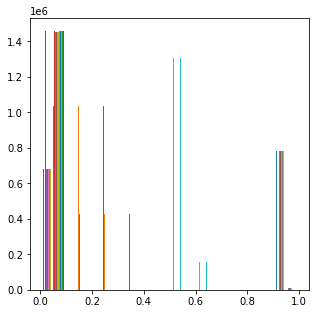

In [95]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(5, 5)

plt.hist(f_pd);
plt.show()

In [32]:
### Теперь найдите оптимальный параметр регуляризации
### для случая Ridge
### Напомним: ошибка на кросс-валидации должно быть 
### строго меньше 0.4
from sklearn.linear_model import Ridge

scores_ridge = []
for train_index, test_index in selector.split(X):

    X_train, X_test = X.values[train_index], X.values[test_index]
    Y_train, Y_test = Y.values[train_index], Y.values[test_index]

    ### Фитим исключительно на трейне!
    scaler = MinMaxScaler()
    scaler.fit(X_train)

    ### Применяем обученный scaler на трейн и тест
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    ### По дефолту здесь параметр регуляризации alpha=1

    model_ridge = Ridge(max_iter=100000, alpha = 0.21 )
    model_ridge.fit(X_train_scaled, Y_train)

    predictions = model_ridge.predict(X_test_scaled)

    scores_ridge.append(np.mean((predictions - Y_test)**2))
    
print(f"MSLE на Кросс-валидации равен: {np.mean(scores_ridge)}")

MSLE на Кросс-валидации равен: 0.3926975243167054


In [5]:
### Найдите оптимальный параметр регуляризации
### для случая Lasso
### Напомним: ошибка на кросс-валидации должно быть 
### строго меньше 0.4

### Задание №8
### Your code is here




for train_index, test_index in selector.split(X):

    X_train, X_test = X.values[train_index], X.values[test_index]
    Y_train, Y_test = Y.values[train_index], Y.values[test_index]

    ### Фитим исключительно на трейне!
    scaler = MinMaxScaler()
    scaler.fit(X_train)

    ### Применяем обученный scaler на трейн и тест
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    ### По дефолту здесь параметр регуляризации alpha=1

    model_lasso = Lasso(max_iter=100000, alpha = alpha[i] )
    model_lasso.fit(X_train_scaled, Y_train)

    predictions = model_lasso.predict(X_test_scaled)

    scores.append(np.mean((predictions - Y_test)**2))


